In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [119]:
df = pd.read_csv("crop_production.csv")
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


# Data Exploration

In [120]:
season =    ['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     ']

state =  ['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'] 

crop = ['Arecanut', 'Other Kharif pulses', 'Rice', 'Banana', 'Cashewnut',
       'Coconut ', 'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Black pepper', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut',
       'Sunflower', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Horse-gram',
       'Jowar', 'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Masoor',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'other misc. pulses',
       'Samai', 'Small millets', 'Coriander', 'Potato',
       'Other  Rabi pulses', 'Soyabean', 'Beans & Mutter(Vegetable)',
       'Bhindi', 'Brinjal', 'Citrus Fruit', 'Cucumber', 'Grapes', 'Mango',
       'Orange', 'other fibres', 'Other Fresh Fruits', 'Other Vegetables',
       'Papaya', 'Pome Fruit', 'Tomato', 'Mesta', 'Cowpea(Lobia)',
       'Lemon', 'Pome Granet', 'Sapota', 'Cabbage', 'Rapeseed &Mustard',
       'Peas  (vegetable)', 'Niger seed', 'Bottle Gourd', 'Varagu',
       'Garlic', 'Ginger', 'Oilseeds total', 'Pulses total', 'Jute',
       'Peas & beans (Pulses)', 'Blackgram', 'Paddy', 'Pineapple',
       'Barley', 'Sannhamp', 'Khesari', 'Guar seed', 'Moth',
       'Other Cereals & Millets', 'Cond-spcs other', 'Turnip', 'Carrot',
       'Redish', 'Arcanut (Processed)', 'Atcanut (Raw)',
       'Cashewnut Processed', 'Cashewnut Raw', 'Cardamom', 'Rubber',
       'Bitter Gourd', 'Drum Stick', 'Jack Fruit', 'Snak Guard', 'Tea',
       'Coffee', 'Cauliflower', 'Other Citrus Fruit', 'Water Melon',
       'Total foodgrain', 'Kapas', 'Colocosia', 'Lentil', 'Bean',
       'Jobster', 'Perilla', 'Rajmash Kholar', 'Ricebean (nagadal)',
       'Ash Gourd', 'Beet Root', 'Lab-Lab', 'Ribed Guard', 'Yam',
       'Pump Kin', 'Apple', 'Peach', 'Pear', 'Plums', 'Litchi', 'Ber',
       'Other Dry Fruit', 'Jute & mesta']

In [121]:
for i in range(0,len(season)):
    df.replace(season[i],i,inplace=True)
    
for i in range(0,len(state)):
    df.replace(state[i],i,inplace=True)

for i in range(0,len(crop)):
    df.replace(crop[i],i,inplace=True)

In [122]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [123]:
# Droping Nan Values
data = df.dropna()
print(data.shape)
test = df[~df["Production"].notna()].drop("Production",axis=1)
print(test.shape)

(242361, 7)
(3730, 6)


In [124]:
sum_maxp = data["Production"].sum()
data["percent_of_production"] = data["Production"].map(lambda x:(x/sum_maxp)*100)

C:\Users\alokr\AppData\Local\Temp\ipykernel_16448\1048416122.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["percent_of_production"] = data["Production"].map(lambda x:(x/sum_maxp)*100)


In [125]:
data[:5]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,percent_of_production
0,0,NICOBARS,2000,0,0,1254.0,2000.0,1.416670e-06
1,0,NICOBARS,2000,0,1,2.0,1.0,7.083351e-10
2,0,NICOBARS,2000,0,2,102.0,321.0,2.273756e-07
3,0,NICOBARS,2000,1,3,176.0,641.0,4.540428e-07
4,0,NICOBARS,2000,1,4,720.0,165.0,1.168753e-07


# Data Visulization

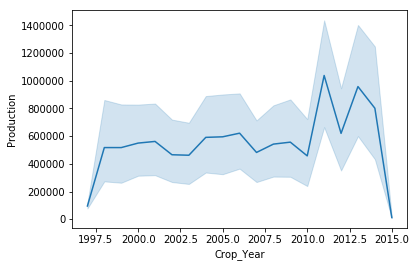

In [8]:
sns.lineplot(data["Crop_Year"],data["Production"])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

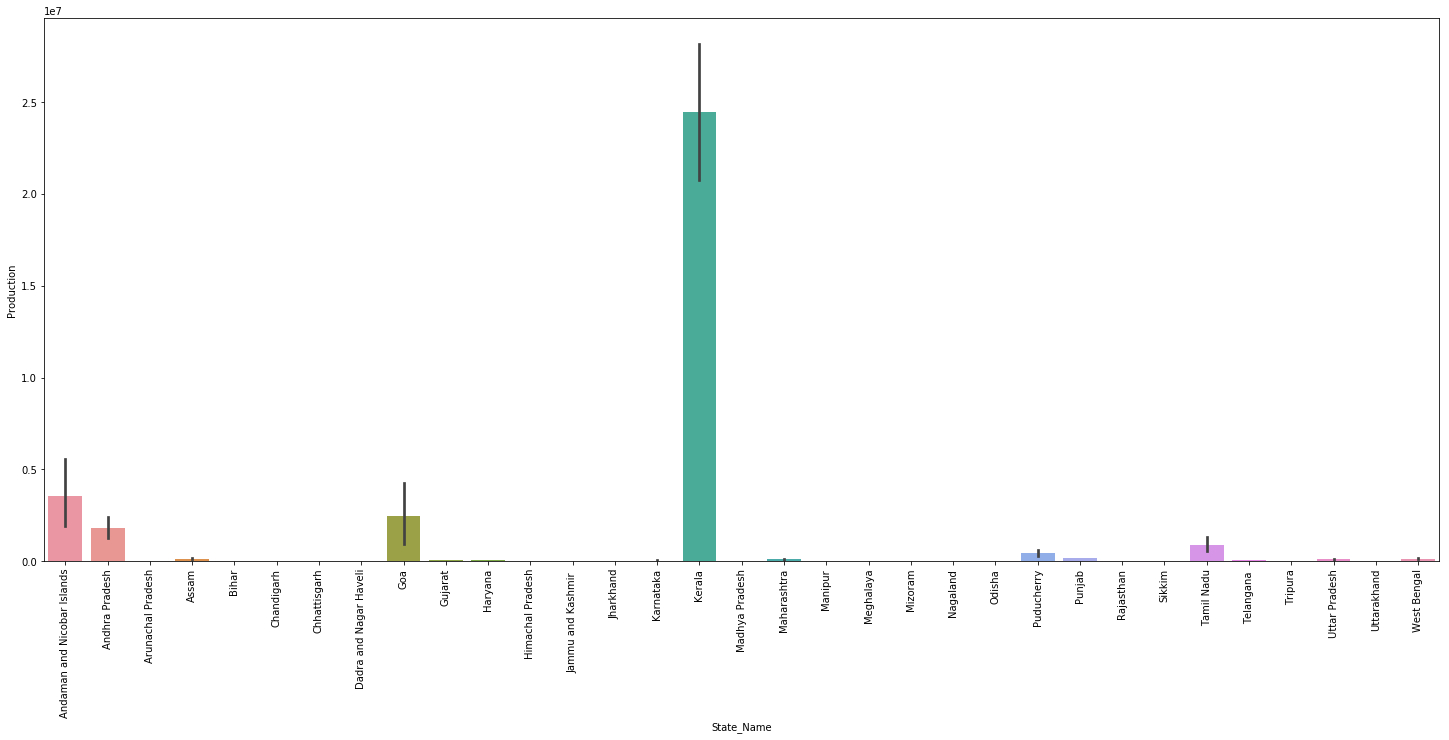

In [9]:
plt.figure(figsize=(25,10))
sns.barplot(data["State_Name"],data["Production"])
plt.xticks(rotation=90)

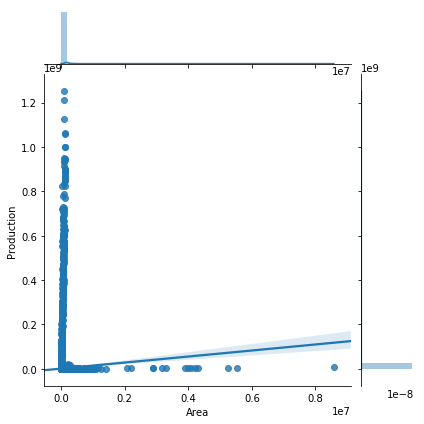

In [10]:
sns.jointplot(data["Area"],data["Production"],kind='reg')

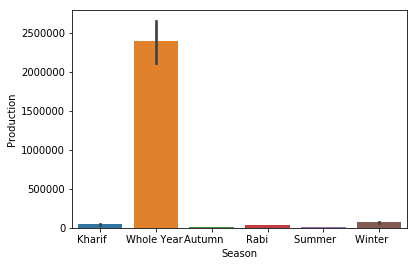

In [11]:
sns.barplot(data["Season"],data["Production"])

In [126]:
data.groupby("Season",axis=0).agg({"Production":np.sum})

,Production
Season,
0,4.029970e+09
1,1.344248e+11
2,6.441377e+07
3,2.051688e+09
4,1.706579e+08
5,4.345498e+08


In [127]:
data["Crop"].value_counts()[:5]

2     15082
14    13787
15    10106
16     9710
31     8821
Name: Crop, dtype: int64

# Feature Selection

In [128]:
data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,percent_of_production
0,0,NICOBARS,2000,0,0,1254.0,2000.0,1.416670e-06
1,0,NICOBARS,2000,0,1,2.0,1.0,7.083351e-10
2,0,NICOBARS,2000,0,2,102.0,321.0,2.273756e-07
3,0,NICOBARS,2000,1,3,176.0,641.0,4.540428e-07
4,0,NICOBARS,2000,1,4,720.0,165.0,1.168753e-07
...,...,...,...,...,...,...,...,...
246086,32,PURULIA,2014,4,2,306.0,801.0,5.673764e-07
246087,32,PURULIA,2014,4,31,627.0,463.0,3.279592e-07
246088,32,PURULIA,2014,1,7,324.0,16250.0,1.151045e-05
246089,32,PURULIA,2014,5,2,279151.0,597899.0,4.235129e-04


In [129]:
data1 = data.drop(["District_Name","Crop_Year"],axis=1)

In [130]:
data1

,State_Name,Season,Crop,Area,Production,percent_of_production
0,0,0,0,1254.0,2000.0,1.416670e-06
1,0,0,1,2.0,1.0,7.083351e-10
2,0,0,2,102.0,321.0,2.273756e-07
3,0,1,3,176.0,641.0,4.540428e-07
4,0,1,4,720.0,165.0,1.168753e-07
...,...,...,...,...,...,...
246086,32,4,2,306.0,801.0,5.673764e-07
246087,32,4,31,627.0,463.0,3.279592e-07
246088,32,1,7,324.0,16250.0,1.151045e-05
246089,32,5,2,279151.0,597899.0,4.235129e-04


In [131]:
data1.State_Name.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
      dtype=int64)

In [132]:
data_dum = pd.get_dummies(data1)
data_dum[:5]

,State_Name,Season,Crop,Area,Production,percent_of_production
0,0,0,0,1254.0,2000.0,1.416670e-06
1,0,0,1,2.0,1.0,7.083351e-10
2,0,0,2,102.0,321.0,2.273756e-07
3,0,1,3,176.0,641.0,4.540428e-07
4,0,1,4,720.0,165.0,1.168753e-07


# Test Train Split

In [149]:
x = data_dum.drop("Production",axis=1)
y = data_dum[["Production"]]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=42)
print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)


x_train : (162381, 5)
x_test : (79980, 5)
y_train : (162381, 1)
y_test : (79980, 1)


In [150]:
x_train[:5]

,State_Name,Season,Crop,Area,percent_of_production
4843,1,0,14,785.0,1.486087e-06
20626,3,2,2,1250.0,5.829598e-07
240277,32,1,7,2.0,1.452087e-07
20664,3,0,71,60.0,4.646678e-07
157859,22,4,15,605.0,6.729184e-08


In [151]:
y_train[:5]

,Production
4843,2098.0
20626,823.0
240277,205.0
20664,656.0
157859,95.0


# Model : Linear Regression

In [152]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [155]:
preds = model.predict(x_test)

In [156]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_test,preds)
r2_score(y_test,preds)

1.0

In [157]:
import pickle as pkl

In [158]:
RF_pkl_filename = 'production.pkl'
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pkl.dump(model, RF_Model_pkl)
RF_Model_pkl.close()